In [5]:
!pip install kaggle

In [7]:
# Configuring the path of kaggle.json file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
# Dataset api

!kaggle competitions download -c cifar-10

 99% 710M/715M [00:04<00:00, 190MB/s]
100% 715M/715M [00:04<00:00, 174MB/s]


In [9]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [10]:
# Extracting the compressed Dataset

from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Dataset Extracted')

Dataset Extracted


In [11]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [12]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 11.4 MB/s eta 0:00:00


In [13]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()     #archive.extractall(path='/content/Training Data')
archive.close()


In [14]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


**Libraries**

In [15]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mping
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

# ResNet50

from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [16]:
filename = os.listdir('/content/train')

In [17]:
type(filename)

list

In [18]:
len(filename)

50000

In [19]:
print(filename[0:3])
print(filename[-3:])

['17563.png', '8982.png', '762.png']
['46193.png', '47183.png', '48250.png']


**Labels** **Processing**

In [20]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [21]:
labels_df.shape

(50000, 2)

In [22]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [23]:
labels_df[labels_df['id'] == 7000]

,id,label
6999,7000,horse


In [24]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [25]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [26]:
labels_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [27]:
labels_df['label']

0              frog
1             truck
2             truck
3              deer
4        automobile
            ...    
49995          bird
49996          frog
49997         truck
49998    automobile
49999    automobile
Name: label, Length: 50000, dtype: object

In [28]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [29]:
print(labels[:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


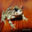

In [30]:
# Displaying Sample Image

import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/45000.png')
cv2_imshow(img)

In [31]:
labels_df[labels_df['id'] == 10001]

,id,label
10000,10001,automobile


In [32]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [33]:
id_list = list(labels_df['id'])

In [34]:
print(id_list[:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


**Image Processing**

In [35]:
# Convert Image to numpy arrays

train_data_folder = '/content/train/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [36]:
type(data)

list

In [37]:
len(data)

50000

In [38]:
type(data[0])

numpy.ndarray

In [39]:
data[0].shape

(32, 32, 3)

In [40]:
data[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [41]:
# Convert image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [42]:
type(X)

numpy.ndarray

In [43]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


**Train Test Split**

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [45]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_train.shape)

(40000, 32, 32, 3) (10000, 32, 32, 3) (40000,) (40000,)


In [46]:
# Scaling the data

X_train_std = X_train/255

X_test_std = X_test/255

In [47]:
X_train_std

array([[[[0.13333333, 0.14117647, 0.16862745],
         [0.14509804, 0.14509804, 0.2       ],
         [0.17254902, 0.17254902, 0.25098039],
         ...,
         [0.24313725, 0.28627451, 0.36470588],
         [0.20392157, 0.24705882, 0.3254902 ],
         [0.17647059, 0.22352941, 0.30196078]],

        [[0.1372549 , 0.1372549 , 0.14509804],
         [0.13333333, 0.13333333, 0.15686275],
         [0.13333333, 0.12941176, 0.16862745],
         ...,
         [0.22745098, 0.27058824, 0.34901961],
         [0.19607843, 0.23529412, 0.31372549],
         [0.18431373, 0.22745098, 0.30588235]],

        [[0.13333333, 0.12941176, 0.1372549 ],
         [0.12941176, 0.1254902 , 0.14117647],
         [0.12941176, 0.1254902 , 0.14901961],
         ...,
         [0.25882353, 0.30196078, 0.38039216],
         [0.2       , 0.24313725, 0.32156863],
         [0.20784314, 0.25098039, 0.32941176]],

        ...,

        [[0.1254902 , 0.1254902 , 0.14901961],
         [0.1254902 , 0.12156863, 0.14509804]

In [48]:
X_train[0]

array([[[34, 36, 43],
        [37, 37, 51],
        [44, 44, 64],
        ...,
        [62, 73, 93],
        [52, 63, 83],
        [45, 57, 77]],

       [[35, 35, 37],
        [34, 34, 40],
        [34, 33, 43],
        ...,
        [58, 69, 89],
        [50, 60, 80],
        [47, 58, 78]],

       [[34, 33, 35],
        [33, 32, 36],
        [33, 32, 38],
        ...,
        [66, 77, 97],
        [51, 62, 82],
        [53, 64, 84]],

       ...,

       [[32, 32, 38],
        [32, 31, 37],
        [33, 33, 38],
        ...,
        [41, 38, 45],
        [34, 31, 38],
        [36, 32, 40]],

       [[33, 31, 36],
        [32, 30, 36],
        [34, 32, 37],
        ...,
        [37, 35, 40],
        [32, 29, 35],
        [30, 28, 33]],

       [[37, 32, 35],
        [37, 32, 36],
        [37, 33, 36],
        ...,
        [49, 47, 49],
        [47, 45, 48],
        [58, 56, 58]]], dtype=uint8)

**Building the Neural Network**

In [49]:
num_of_classess = 10

# Setting up the layers of Neural Network

model = keras.Sequential([

                          keras.layers.Flatten(input_shape = (32,32,3)),
                          keras.layers.Dense(64, activation = 'relu'),
                          keras.layers.Dense(num_of_classess, activation = 'softmax')
])

In [50]:
# Comple the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [51]:
# Training the Neural Network

model.fit(X_train_std, Y_train, validation_split=0.1, epochs=25)

Epoch 1/25
1125/1125 [==============================] - 9s 4ms/step - loss: 2.0237 - acc: 0.2413 - val_loss: 1.9378 - val_acc: 0.2745
Epoch 2/25
1125/1125 [==============================] - 3s 3ms/step - loss: 1.9171 - acc: 0.2924 - val_loss: 1.8840 - val_acc: 0.3137
Epoch 3/25
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8707 - acc: 0.3161 - val_loss: 1.8696 - val_acc: 0.3195
Epoch 4/25
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8462 - acc: 0.3264 - val_loss: 1.8696 - val_acc: 0.3067
Epoch 5/25
1125/1125 [==============================] - 4s 4ms/step - loss: 1.8326 - acc: 0.3278 - val_loss: 1.8449 - val_acc: 0.3243
Epoch 6/25
1125/1125 [==============================] - 4s 4ms/step - loss: 1.8175 - acc: 0.3357 - val_loss: 1.8499 - val_acc: 0.3260
Epoch 7/25
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8146 - acc: 0.3362 - val_loss: 1.8374 - val_acc: 0.3252
Epoch 8/25
1125/1125 [==============================] - 4s 3ms

In [52]:
loss, accuracy = model.evaluate(X_test_std, Y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 1.7884 - acc: 0.3485
Test Accuracy = 0.34850001335144043


**ResNet50**

In [53]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [54]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [55]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [56]:
history = model.fit(X_train_std, Y_train, validation_split = 0.1, epochs = 5)

Epoch 1/5
1125/1125 [==============================] - 459s 374ms/step - loss: 2.2423 - acc: 0.1969 - val_loss: 1.7959 - val_acc: 0.3565
Epoch 2/5
1125/1125 [==============================] - 431s 383ms/step - loss: 1.6083 - acc: 0.4049 - val_loss: 1.8615 - val_acc: 0.3740
Epoch 3/5
1125/1125 [==============================] - 431s 383ms/step - loss: 1.3159 - acc: 0.5350 - val_loss: 1.2536 - val_acc: 0.5592
Epoch 4/5
1125/1125 [==============================] - 424s 377ms/step - loss: 1.1597 - acc: 0.6004 - val_loss: 1.1692 - val_acc: 0.6185
Epoch 5/5
1125/1125 [==============================] - 431s 383ms/step - loss: 1.0566 - acc: 0.6431 - val_loss: 1.0681 - val_acc: 0.6235


In [57]:
loss, accuracy = model.evaluate(X_test_std, Y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 37s 114ms/step - loss: 1.0572 - acc: 0.6271
Test Accuracy = 0.6270999908447266


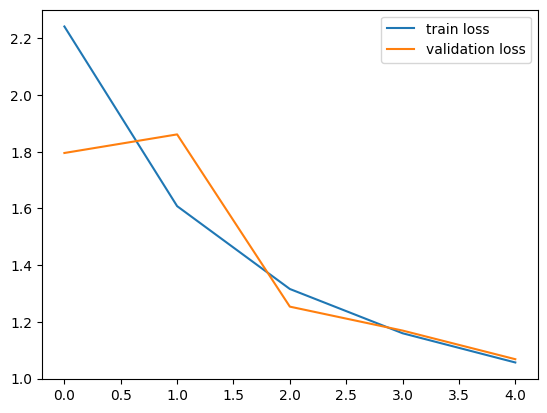

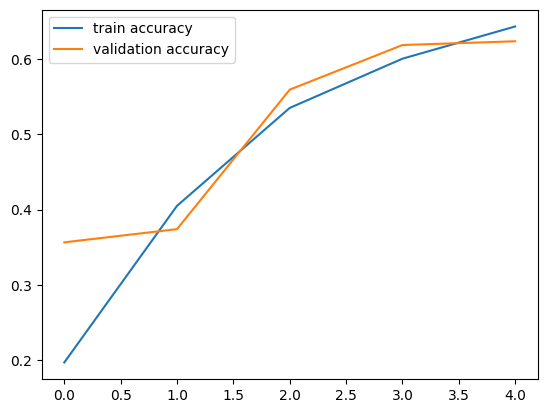

In [58]:
h = history

# Plot the Loss value

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# Plot the Accuracy value

plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [61]:
model.save('ResNet50.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
